In [4]:
from utils import *
from methods import *
import numpy as np
import matplotlib.pyplot as plt

C:\Users\hoang\anaconda3\envs\proj_251b_289a_env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Plot Decision Trees and Ensemble Learning

Best NRMSE: 0.09362709764685793
Best Depth: 7
Depth: 16
NRMSE: 0.07802336992743915
Depth: 7
NRMSE: 0.07073104939383773
Best NRMSE: 0.09868267693606295
Best Depth: 4
Depth: 17
NRMSE: 0.09955425320732084
Depth: 4
NRMSE: 0.09751038803545359
Best NRMSE: 0.12238509082404701
Best Depth: 5
Depth: 15
NRMSE: 0.0987103581540209
Depth: 5
NRMSE: 0.08979171334194809
Best NRMSE: 0.13499754024734872
Best Depth: 6
Depth: 16
NRMSE: 0.09741436206826143
Depth: 6
NRMSE: 0.08327206694496136
['32-bit 2-input ALU', '64-bit 2-input ALU', '32-bit 2-input MUX', 'BCD to 7-seg decoder']
{'Decision Tree': [0.09362709764685793, 0.09868267693606295, 0.12238509082404701, 0.13499754024734872], 'Boosted Decision Tree': [0.07073104939383773, 0.09751038803545359, 0.08979171334194809, 0.08327206694496136], 'Random Forest': [0.07802336992743915, 0.09955425320732084, 0.0987103581540209, 0.09741436206826143]}


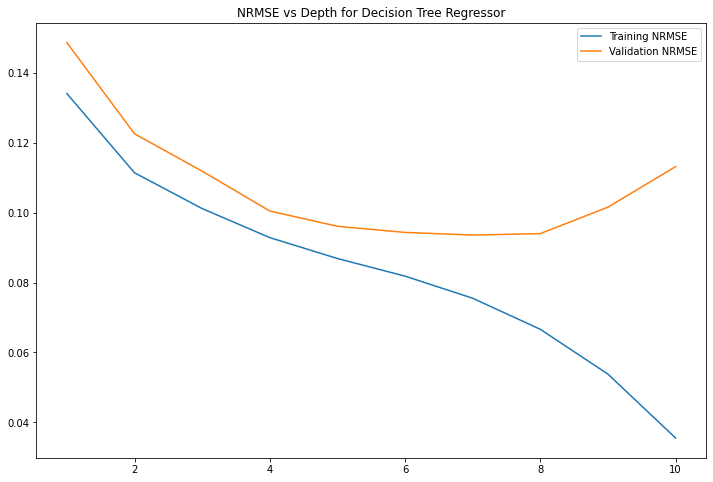

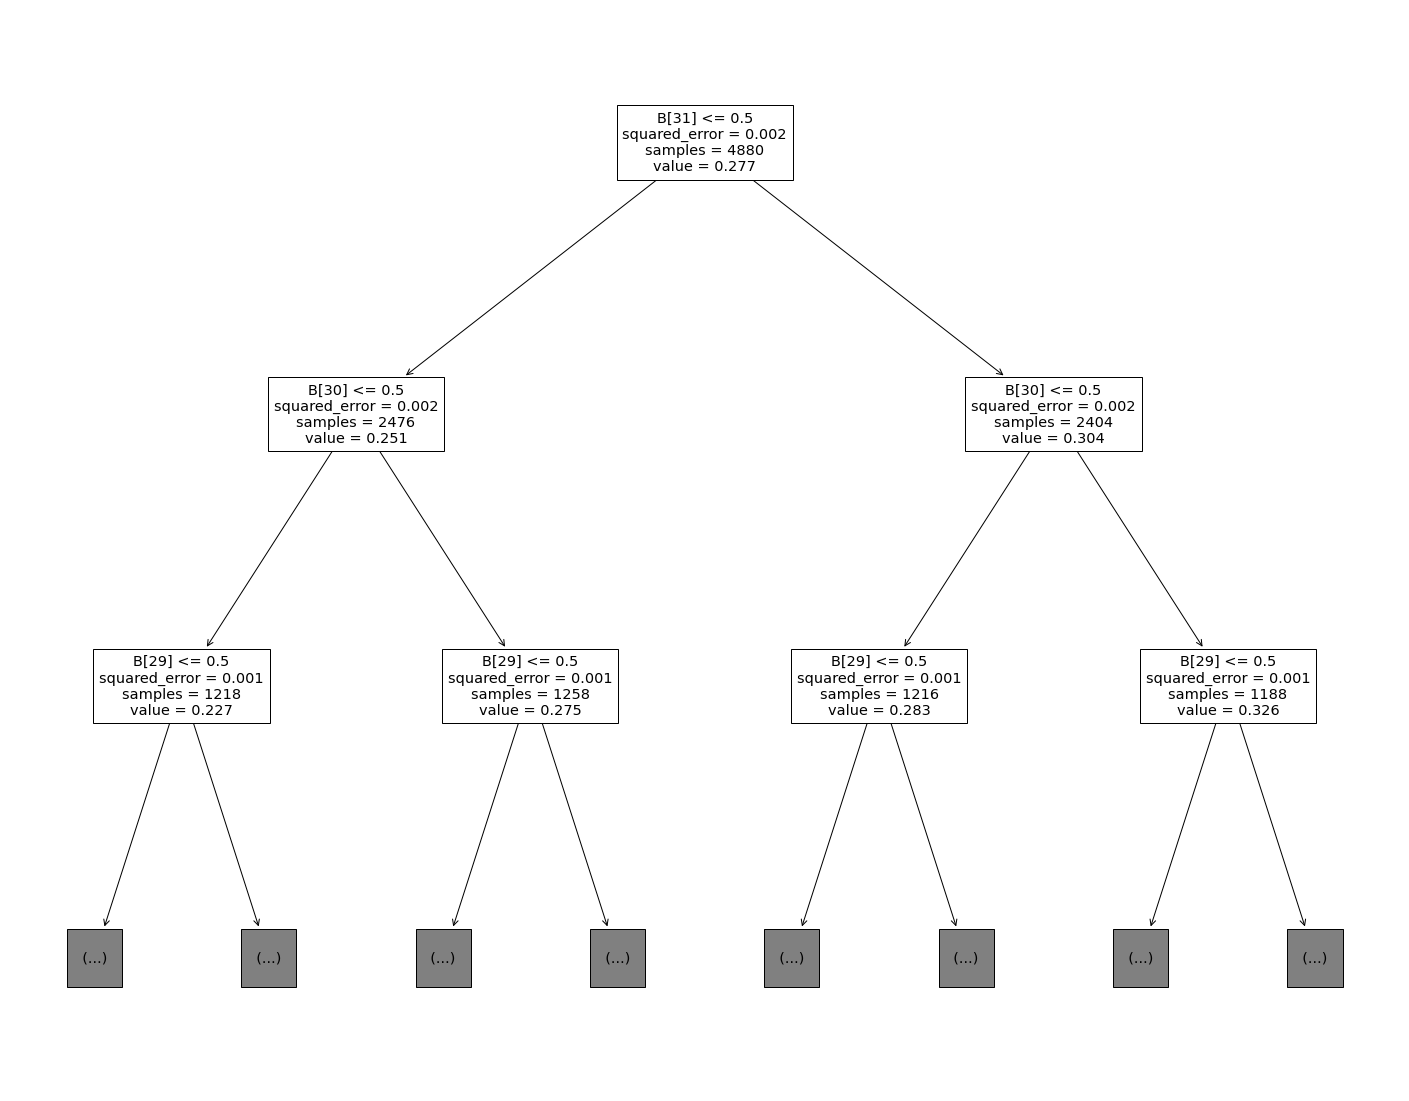

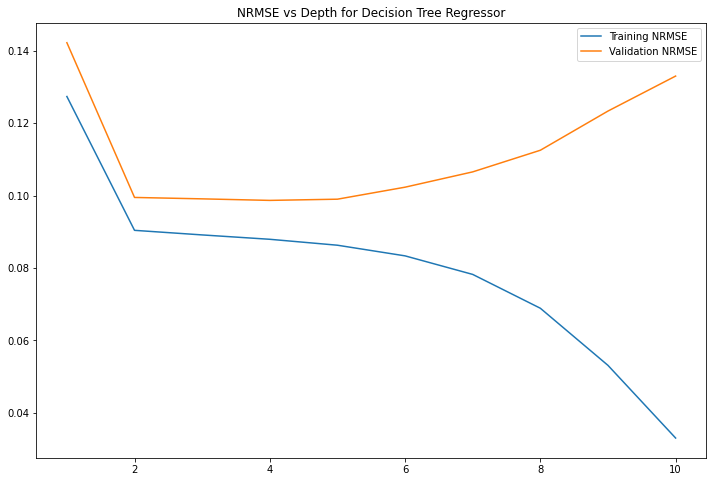

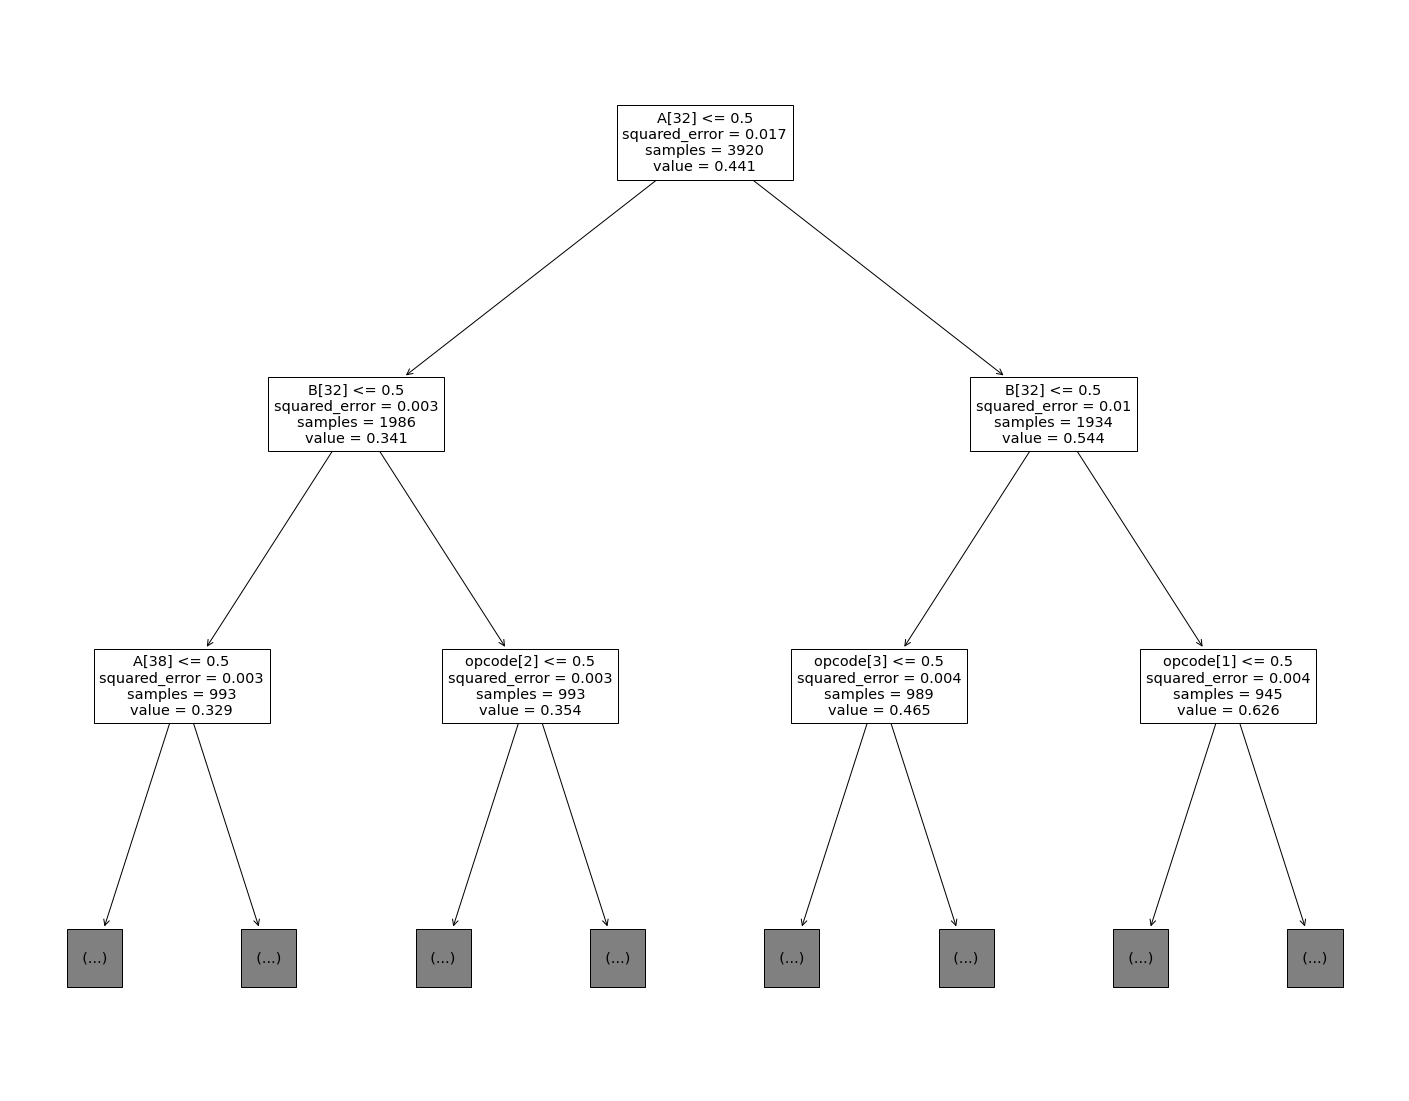

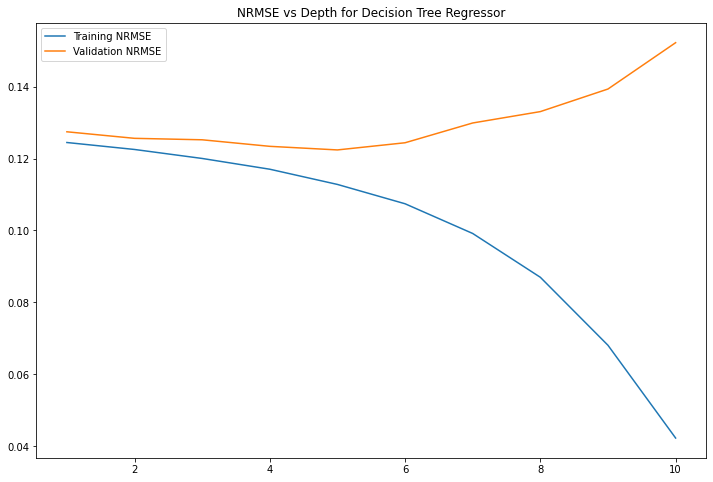

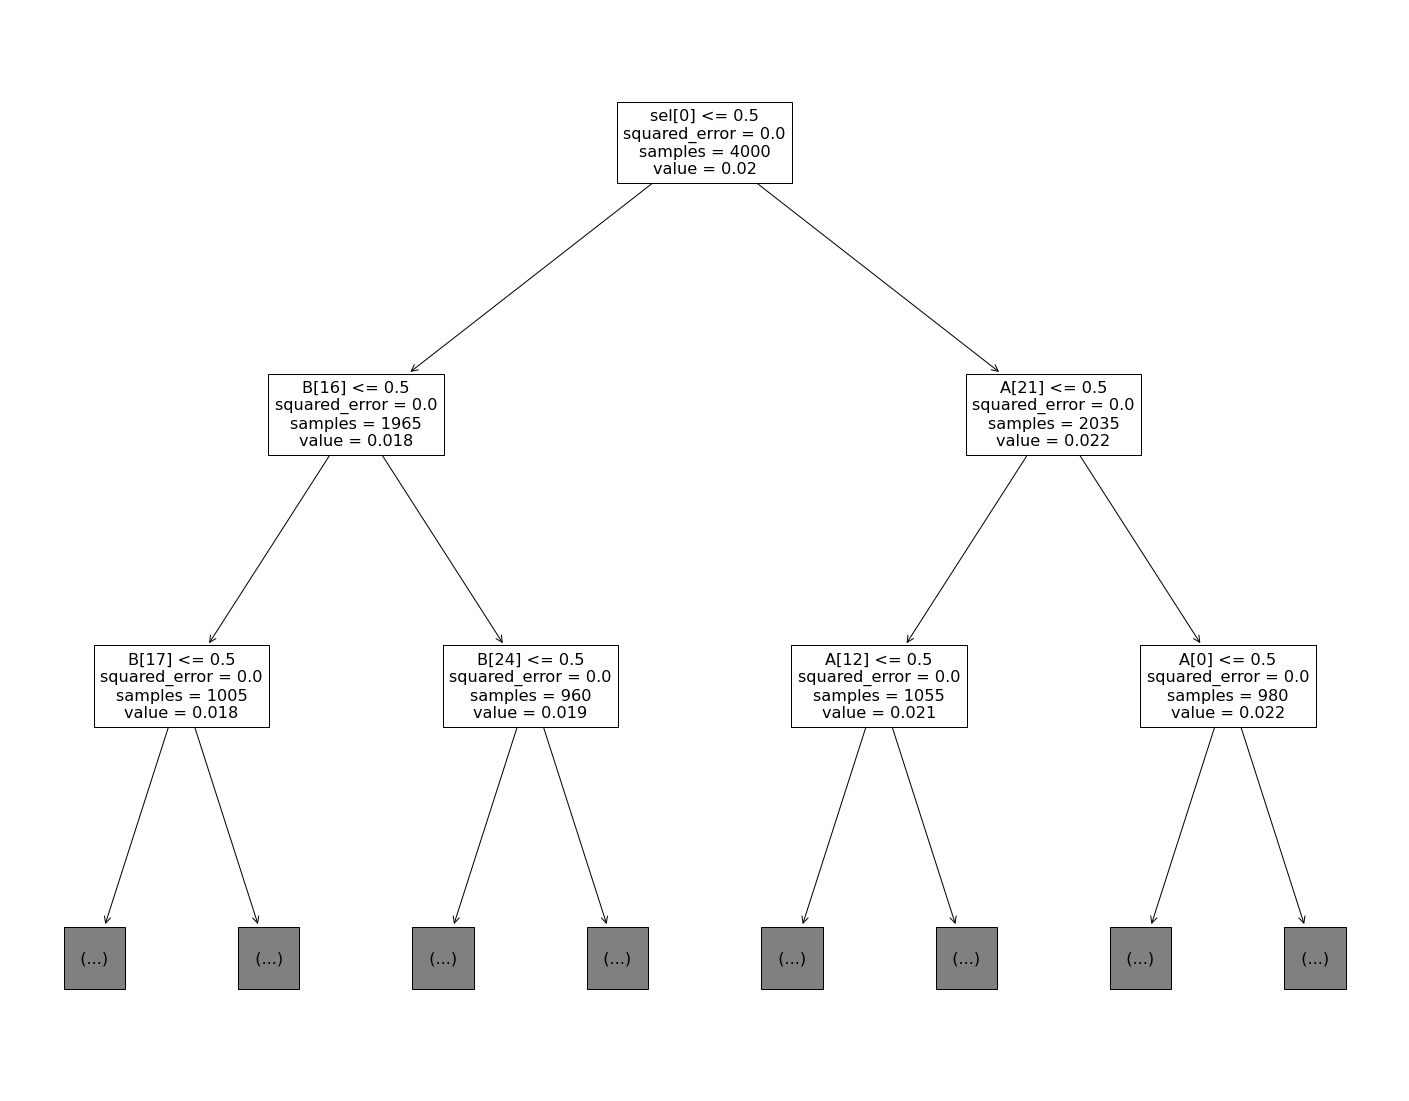

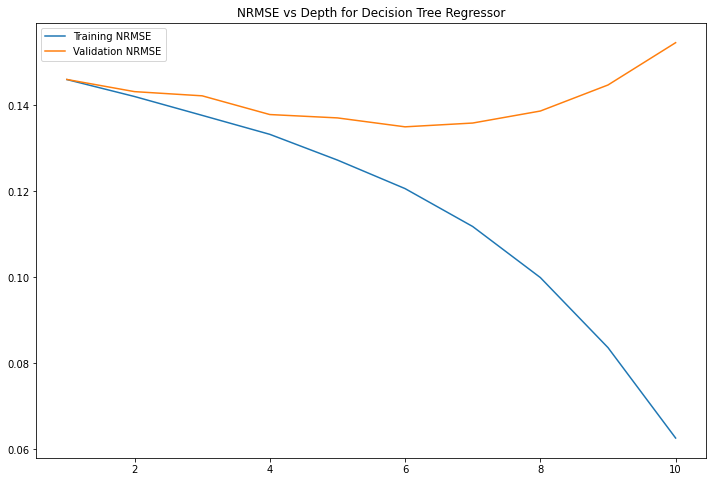

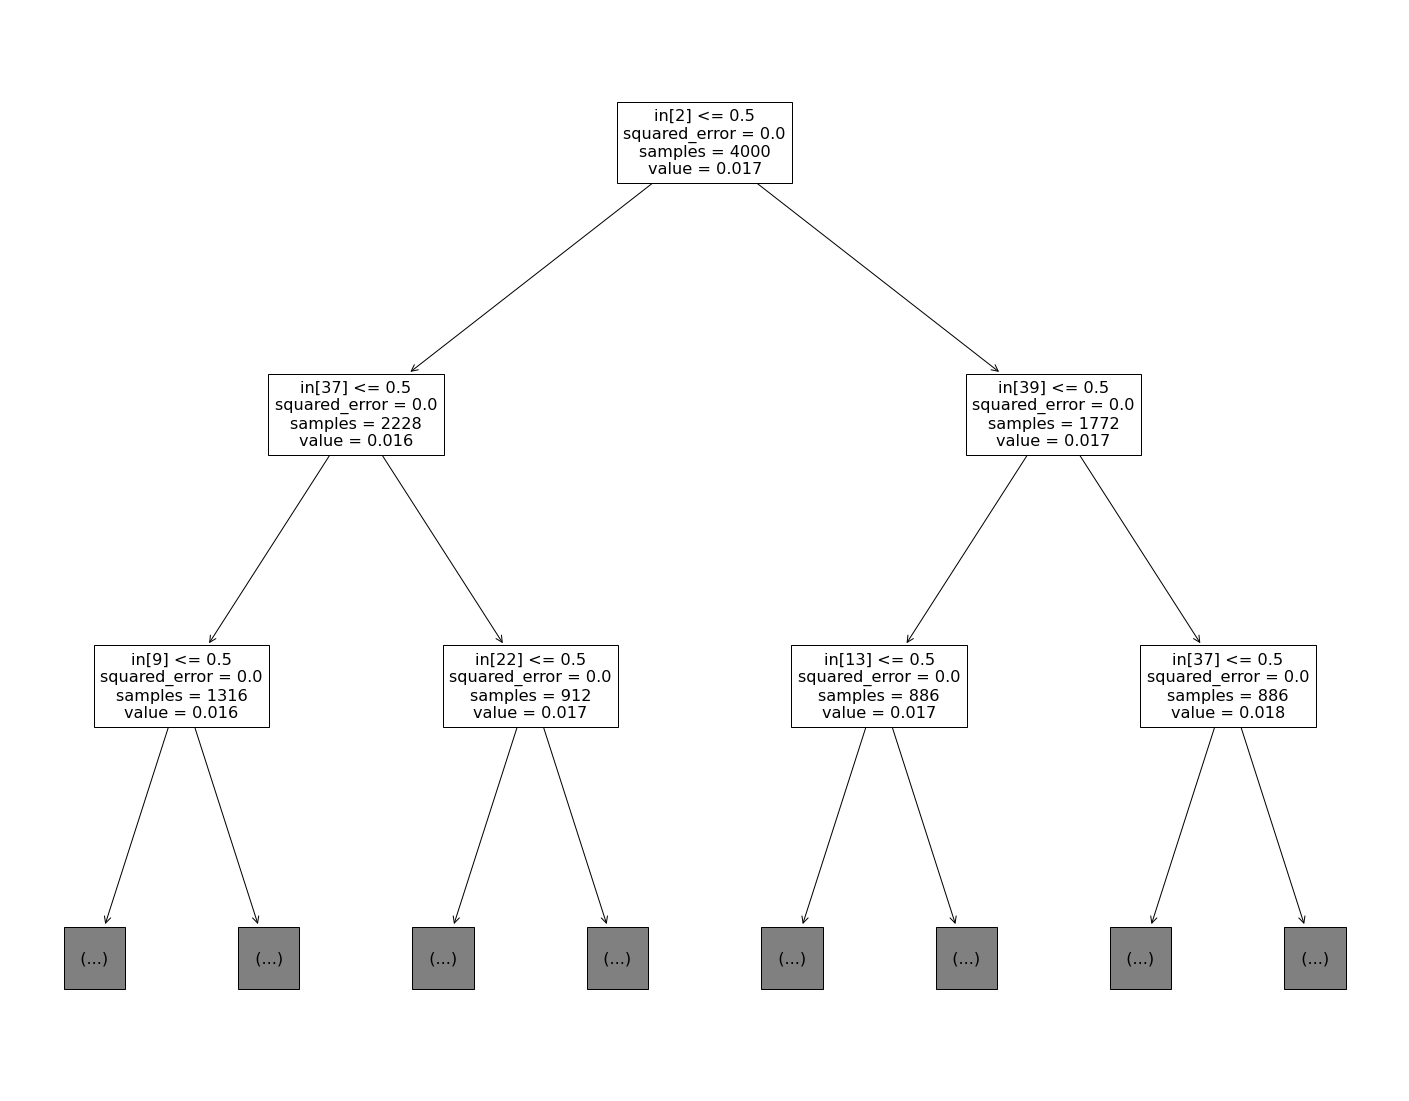

In [2]:
circuit_names = ["32-bit 2-input ALU", "64-bit 2-input ALU", "32-bit 2-input MUX", 'BCD to 7-seg decoder']
circuits = ["alu32", "alu64", "mux32", "7sg"]
operands_nums = [32, 64, 32, 40]
opcodes_nums = [4, 4, 1, 0]

best_depth_boosted_dt = {
    "alu32": 7, 
    "alu64": 4, 
    "mux32": 5, 
    "7sg": 6
}

NRMSE = {
    "Decision Tree": [], 
    "Boosted Decision Tree": [], 
    "Random Forest": [], 
}

RAND_SEED = 251289

n_estimators = 100

epochs = 30
batch_size = 100
learning_rate = 1e-3

for id, circuit in enumerate(circuits):
    X_train, X_validation, y_train, y_validation, features = load_and_split_dataset(file=f"dataset/processed_power_data_{circuit}.mat", 
                                                                                    validation_size=0.2,
                                                                                    RAND_SEED = RAND_SEED)

    nrmse_dt, best_depth_dt = tune_DT(X_train, y_train, X_validation, y_validation, circuit=circuit, RAND_SEED=RAND_SEED)
    NRMSE["Decision Tree"].append(nrmse_dt)

    operands_num = operands_nums[id]
    opcodes_num = opcodes_nums[id]

    if "alu" in circuit:
        operandsA = ["A[" + str(bit) + "]" for bit in range(0, operands_num)]
        operandsB = ["B[" + str(bit) + "]" for bit in range(0, operands_num)]
        opcode = ["opcode[" + str(bit) + "]" for bit in range(0, opcodes_num)]
        feature_name = operandsA + operandsB + opcode
    elif "mux" in circuit:
        operandsA = ["A[" + str(bit) + "]" for bit in range(0, operands_num)]
        operandsB = ["B[" + str(bit) + "]" for bit in range(0, operands_num)]
        opcode = ["sel[" + str(bit) + "]" for bit in range(0, opcodes_num)]
        feature_name = operandsA + operandsB + opcode
    elif "7sg" in circuit:
        operandsA = ["in[" + str(bit) + "]" for bit in range(0, operands_num)]
        feature_name = operandsA

#     dt_text_representation = visualize_DT(feature_name, X_train, y_train, best_depth_dt, show_depth=best_depth_dt, circuit=circuit, RAND_SEED=RAND_SEED)
    _ = visualize_DT(feature_name, X_train, y_train, best_depth_dt, show_depth=2, circuit=circuit, RAND_SEED=RAND_SEED)

    nrmse_rf, _ = random_forest(X_train, y_train, X_validation, y_validation, n_estimators=n_estimators, RAND_SEED=RAND_SEED)
    NRMSE["Random Forest"].append(nrmse_rf)

    nrmse_boosted_dt, _ = adaboost_DT(X_train, y_train, X_validation, y_validation, bestdepth=best_depth_dt, n_estimators=n_estimators, RAND_SEED=RAND_SEED)
    NRMSE["Boosted Decision Tree"].append(nrmse_boosted_dt)


In [4]:
print(circuit_names)
print(NRMSE)

['32-bit 2-input ALU', '64-bit 2-input ALU', '32-bit 2-input MUX', 'BCD to 7-seg decoder']
{'Decision Tree': [0.09362709764685793, 0.09868267693606295, 0.12238509082404701, 0.13499754024734872], 'Boosted Decision Tree': [0.07073104939383773, 0.09751038803545359, 0.08979171334194809, 0.08327206694496136], 'Random Forest': [0.07802336992743915, 0.09955425320732084, 0.0987103581540209, 0.09741436206826143]}


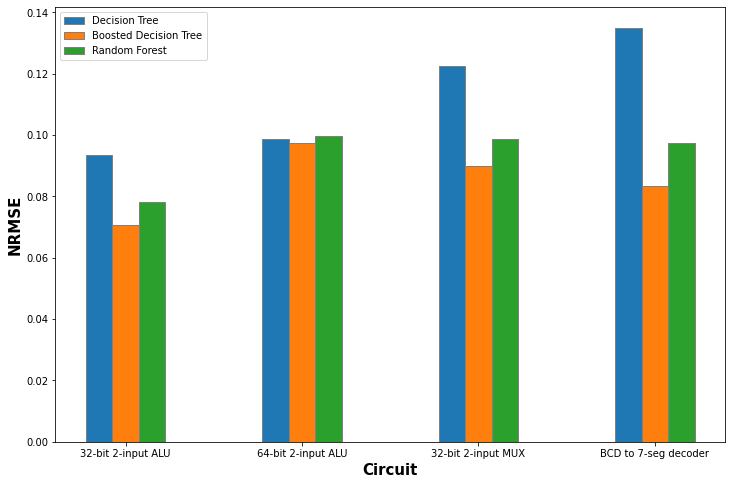

In [3]:
num_circuits = len(circuit_names)

# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize=(12, 8))
 
# Set position of bar on X axis
br = []
for id, (model, error) in enumerate(NRMSE.items()):
    if id == 0:
        br.append(np.arange(num_circuits))
    else:
        br.append( [x + barWidth for x in br[id-1]] )

    # Make the plot
    plt.bar(br[id], error, width=barWidth, edgecolor='grey', label=model)

# Adding Xticks
plt.xlabel('Circuit', fontweight='bold', fontsize=15)
plt.ylabel('NRMSE', fontweight='bold', fontsize=15)
plt.xticks([r + 1*barWidth for r in range(num_circuits)], circuit_names)
 
plt.legend()
plt.savefig("images/trees_and_ensemble_learning.png")

In [5]:
# Decision tree for all circuits
from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor


RAND_SEED = 251289
circuit_names = ["32-bit 2-input ALU", "64-bit 2-input ALU", "32-bit 2-input MUX", 'BCD to 7-seg decoder']
circuits = ["alu32", "alu64", "mux32", "7sg"]
depths = np.arange(1, 11)

training_NRMSE_all = []
validation_NRMSE_all = []

for id, circuit in enumerate(circuits):
    print('Circuit: ', circuit)
    X_train, X_validation, y_train, y_validation, features = load_and_split_dataset(file=f"dataset/processed_power_data_{circuit}.mat", 
                                                                                validation_size=0.2,
                                                                                RAND_SEED = RAND_SEED)
    training_NRMSE = []
    validation_NRMSE = []
    
    for depth in depths:
        regressor = DecisionTreeRegressor(random_state=RAND_SEED, max_depth=depth)
        regressor.fit(X_train, y_train)

        #Construct the Predictions
        y_pred_train = regressor.predict(X_train)
        y_pred_train = np.reshape(y_pred_train, (len(y_pred_train), 1))
        training_NRMSE.append(get_NRMSE(y_train, y_pred_train))

        y_pred = regressor.predict(X_validation)
        y_pred = np.reshape(y_pred, (len(y_pred), 1))
        validation_NRMSE.append(get_NRMSE(y_validation, y_pred))

    training_NRMSE_all.append(training_NRMSE)
    validation_NRMSE_all.append(validation_NRMSE)

Circuit:  alu32
Circuit:  alu64
Circuit:  mux32
Circuit:  7sg


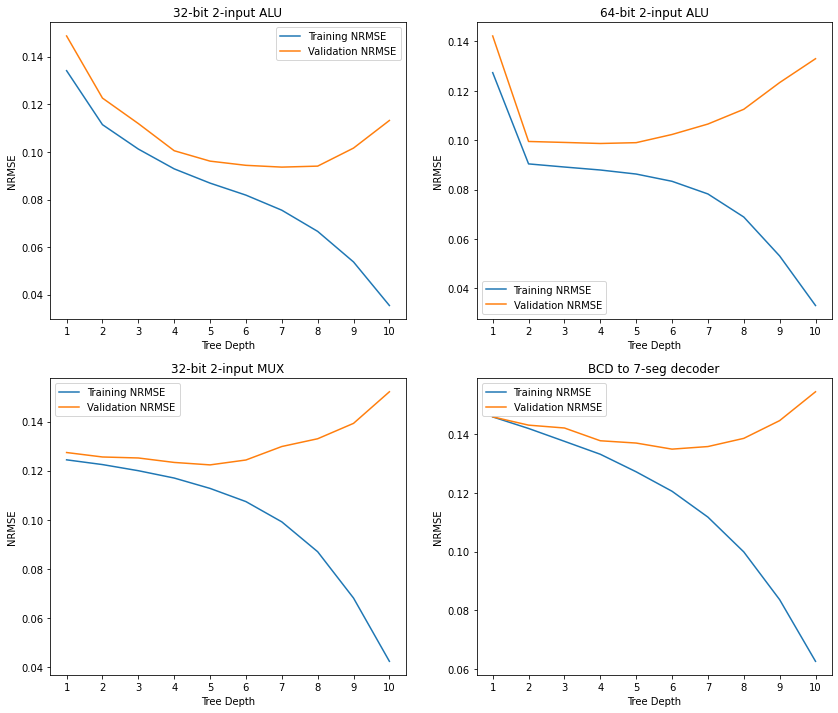

In [9]:
fig = plt.figure(figsize=(14,12))

ax = [0, 0, 0, 0]
ax[0] = fig.add_subplot(221)
ax[1] = fig.add_subplot(222)
ax[2] = fig.add_subplot(223)
ax[3] = fig.add_subplot(224)

for id, circuit in enumerate(circuits):
    ax[id].plot(depths, training_NRMSE_all[id], label='Training NRMSE')
    ax[id].plot(depths, validation_NRMSE_all[id], label='Validation NRMSE')
    ax[id].set_xlabel("Tree Depth")
    ax[id].set_ylabel("NRMSE")
    ax[id].set_title(circuit_names[id])
    ax[id].set_xticks(np.arange(min(depths), max(depths)+1, 1.0))
    ax[id].legend()

plt.savefig("images/trees_and_ensemble_learning/decision_tree_sweep.png")

## Find best depths

In [ ]:
# Decision tree for all circuits
RAND_SEED = 251289
circuits = ["alu32", "alu64", "mux32", "7sg"]
operands_nums = [32, 64, 32, 40]
opcodes_nums = [4, 4, 1, 0]

best_depths_boosted_dts = []
for id, circuit in enumerate(circuits):
    print('Circuit: ', circuit)
    X_train, X_validation, y_train, y_validation, features = load_and_split_dataset(file=f"dataset/processed_power_data_{circuit}.mat", 
                                                                                    validation_size=0.2,
                                                                                    RAND_SEED = RAND_SEED)
    dt_bestNRMSE, dt_bestdepth = tune_DT(X_train, y_train, X_validation, y_validation, circuit=circuit, RAND_SEED=RAND_SEED)

    operands_num = operands_nums[id]
    opcodes_num = opcodes_nums[id]
    
    if "alu" in circuit:
        operandsA = ["A[" + str(bit) + "]" for bit in range(0, operands_num)]
        operandsB = ["B[" + str(bit) + "]" for bit in range(0, operands_num)]
        opcode = ["opcode[" + str(bit) + "]" for bit in range(0, opcodes_num)]
        feature_name = operandsA + operandsB + opcode
    elif "mux" in circuit:
        operandsA = ["A[" + str(bit) + "]" for bit in range(0, operands_num)]
        operandsB = ["B[" + str(bit) + "]" for bit in range(0, operands_num)]
        opcode = ["sel[" + str(bit) + "]" for bit in range(0, opcodes_num)]
        feature_name = operandsA + operandsB + opcode
    elif "7sg" in circuit:
        operandsA = ["in[" + str(bit) + "]" for bit in range(0, operands_num)]
        feature_name = operandsA

    dt_text_representation = visualize_DT(feature_name, X_train, y_train, dt_bestdepth, show_depth=dt_bestdepth, circuit=circuit, RAND_SEED=RAND_SEED)
    _ = visualize_DT(feature_name, X_train, y_train, dt_bestdepth, show_depth = 2, RAND_SEED = RAND_SEED)

    # print(dt_text_representation) #if you want a text representation of the full DT

    rf_NRMSE, firstdepth = random_forest(X_train, y_train, X_validation, y_validation, n_estimators=100, RAND_SEED=RAND_SEED)

    adaboost_NRMSE, best_depth_boosted_dt = adaboost_DT(X_train, y_train, X_validation, y_validation, bestdepth=dt_bestdepth, 
                                 n_estimators=100, RAND_SEED=RAND_SEED)

    best_depths_boosted_dts.append( (best_depth_boosted_dt, adaboost_NRMSE) )

In [ ]:
print(best_depths_boosted_dts)

In [ ]:
RAND_SEED = 251289
X_train, X_validation, y_train, y_validation, features = load_and_split_dataset(file="dataset/processed_power_data_alu32.mat", 
                                                                                validation_size=0.2,
                                                                                RAND_SEED = RAND_SEED)


## Decision Trees

In [ ]:
dt_bestNRMSE, dt_bestdepth = tune_DT(X_train, y_train, X_validation, y_validation, RAND_SEED = RAND_SEED)

In [ ]:
operands_num = 32
opcode = 4
operandsA = ["A[" + str(bit) + "]" for bit in range(0, operands_num)]
operandsB = ["B[" + str(bit) + "]" for bit in range(0, operands_num)]
opcode = ["opcode[" + str(bit) + "]" for bit in range(0, opcode)]
feature_name = operandsA + operandsB + opcode

dt_text_representation = visualize_DT(feature_name, X_train, y_train, dt_bestdepth, show_depth = dt_bestdepth, RAND_SEED = RAND_SEED)
_ = visualize_DT(feature_name, X_train, y_train, dt_bestdepth, show_depth = 2, RAND_SEED = RAND_SEED)

#print(dt_text_representation) #if you want a text representation of the full DT



## Random Forest

In [ ]:
rf_NRMSE, firstdepth = random_forest(X_train, y_train, X_validation, y_validation, n_estimators = 100, RAND_SEED = RAND_SEED)

## AdaBoosted Decision Trees

In [ ]:
adaboost_NRMSE, bdt_bestdepth = adaboost_DT(X_train, y_train, X_validation, y_validation, bestdepth = dt_bestdepth, 
                             n_estimators = 100, RAND_SEED = RAND_SEED)
   
    

## Conclusion: NRMSE Analysis of ALU32

In [ ]:
bar_graph(module_names = ["ALU32"], dt = [dt_bestNRMSE], rf = [rf_NRMSE], ab_dt = [adaboost_NRMSE])